# Golden Square Fractal (August 26, 2023 update!)

The code below draws a fractal shape with the color scheme carefully manipulated to make it pretty. See the resulting shape below the code.

__August 26 update:__ An explanation follows.

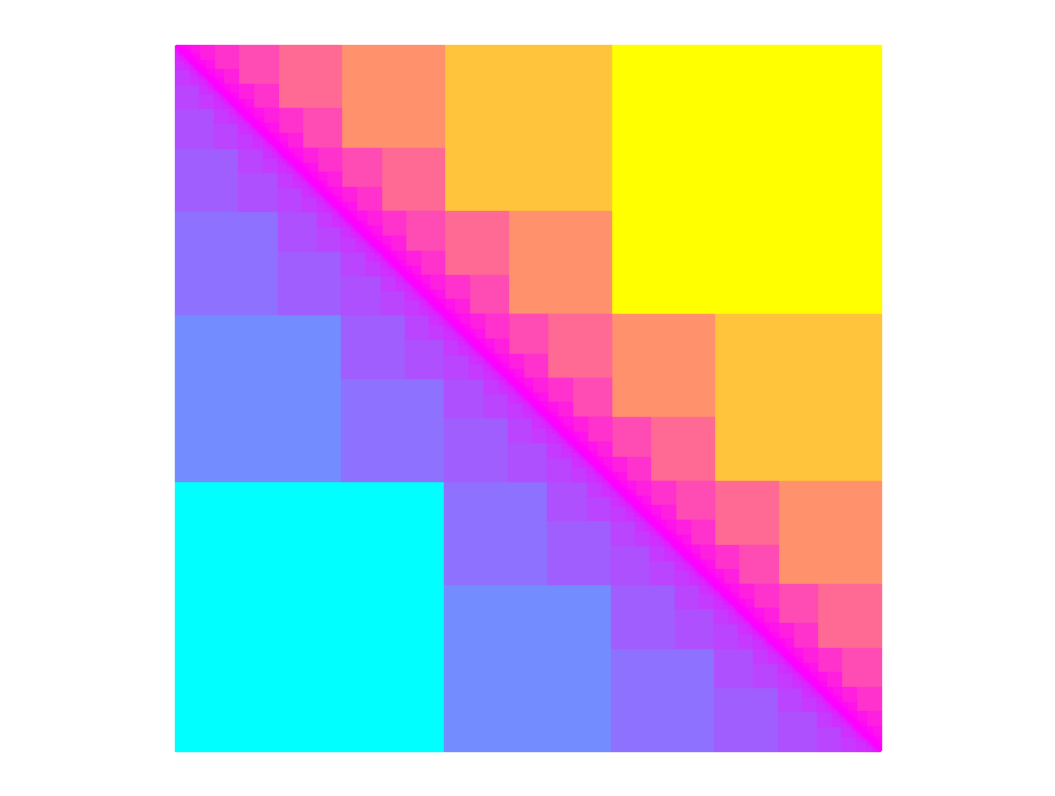

In [1]:
'''
Creates a fractal image using psi, the reciprocal of phi. i.e. phi = (1+sqrt(5))/2 and psi = 2/(1+sqrt(5)) = (sqrt(5)-1)/2.
The code operates in iterations. The nth iteration produces squares with side length psi^n. The squares are arranged in such
a way that they fill in a phi x phi square. The squares are colored in a way I thought looked interesting.
'''

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from itertools import chain, combinations
import numpy as np


def powerset(s):
# Returns the powerset of s. I cheated a little; s doesn't need to be a set. The output is a list, not a set, and
# The elements of the output "set" are tuples rather than sets.
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

def CreatePlot(fig, ax, colors, colors2, depth, SECOND_HALF):
    phi = (5**.5 + 1)/2 # Golden ratio
    psi = 1/phi
    sideLength = 1
    for i in range(0, depth): # for iteration i
        sideLength *= psi
        powers = range(1, i + 1) # powers of psi
        psiPowers = set([psi ** p for p in powers])
        
    #    coords = set() # lower-left coordinate of squares for this iteration
    #    for tupl in powerset(psiPowers): # fill the coords set
    #        x = sum(tupl)
    #        y = sum(psiPowers - set(tupl))
    #        coords.add((x, y))

        # This line implements in one line the commented five code lines above.
        coords = set([(sum(tupl), sum(psiPowers - set(tupl))) for tupl in powerset(psiPowers)])
        # The coords set contains the lower-left coordinate of each square of the ith iteration. I made it a set to eliminate
        # duplicate coordinates, of which there will be a large number.

        for coord in coords:
            square = mpatches.Rectangle(coord, sideLength, sideLength, color = colors((i/(depth))**(.3)))
            ax.add_patch(square)
            if SECOND_HALF: # The first half of the image is a right triangle with its right angle at the lower-left.
                            # The code below reflects the triangle towards the upper-right to form the second half of a square.
                            # The second half is colored differently for interest.
                # Elementwise subtraction of each coordinate pair from (phi, phi) to reflect the triangle
                # using map() + lambda.
                coord2 = tuple(map(lambda i, j: i - j, (phi, phi), coord))
                # The result of the subtraction is the upper-right corner location of the squares in the second half.
                square = mpatches.Rectangle(coord2, -sideLength, -sideLength, color = colors2((1-i/(depth-1))**(10/3)))
                ax.add_patch(square)

SAVE = False
SECOND_HALF = True
depth = 14  # 14 iterations is enough. The image doesn't change in further iterations.              
# start building the plot 
fig = plt.figure()
phi = (5**.5 + 1)/2 # Golden ratio
ax = plt.axes([0,0,phi,phi])
colors = plt.get_cmap("cool") # Color palate for the lower-left half of the square.
colors2 = plt.get_cmap("spring") # Color palate for the upper-right half.

CreatePlot(fig, ax, colors, colors2, depth, SECOND_HALF)
    
ax.set_xticks([]); ax.set_yticks([]) # suppress display of axes
plt.axis('equal') # adjust horizontal/vertical scales so the image renders as a square
plt.axis('off') # suppress border display

if SAVE:
    plt.savefig('square.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

I'll try explaining the algorithm step by step. 

First a bit of mathematic background. As mentioned in the code comments, the fractal is built using squares whose side lengths are powers of $\psi = \frac{\sqrt 5 - 1}{2}$ which is the reciprocal of the Golden Ratio $\phi = \frac{\sqrt 5 + 1}{2}$, i.e. $\psi = \frac{1}{\phi}$. $\psi$ obeys a curious recursive property:  

```{math}
:label: psi_recursion_eqn
\psi^{n+2} + \psi^{n+1} = \psi^n
```

In words, the sum of two consecutive powers of $\psi$ equals the previous power of $\psi$. Since the component squares in the figue have side lengths of powers of $\psi$, equation {eq}`psi_recursion_eqn` will be useful in understanding the fractal.

For the remainder of this article, any text that refers to placing a square at a certain point means that the _lower left corner_ is placed at the stated point. This seems to me to be the easiest way to conceive how the algorithm works and happens to coincide with the syntax of the Matplotlib library in Python. 

Now let's break the fractal down conceptually. We'll focus on the lower-left half first. Let's see a rendering that includes axes to show the scale of the image:

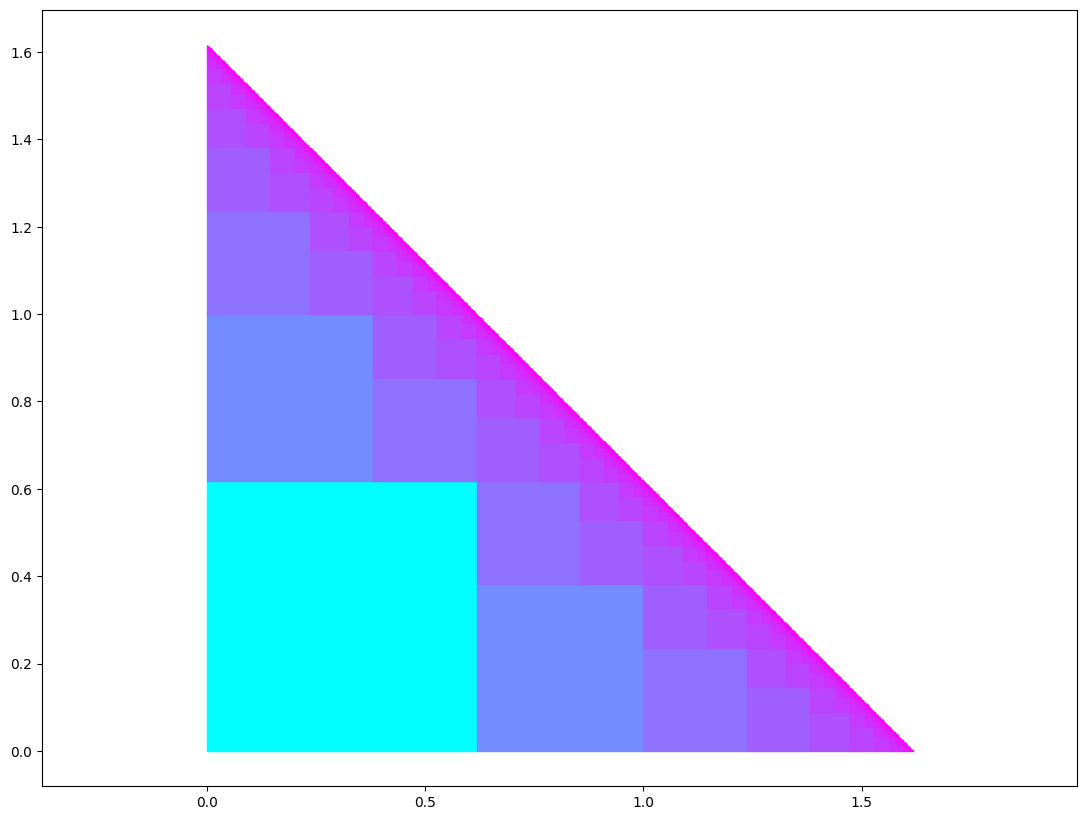

In [2]:
depth = 14                
# start building the plot 
fig = plt.figure()
ax = plt.axes([0,0,phi,phi])

CreatePlot(fig, ax, colors, colors2, depth, False)

plt.axis('equal') # adjust horizontal/vertical scales so the image renders as a square
plt.show()

Notice that the origin is at the lower-left corner and the fractal appears in the first quandrant, i.e. the area where $x$ and $y$ values are positive. See that the length of bottom edge length is about $1.6$. The bottom edge is formed by (in principle) infinitely many squares side-by-side each with side length $\psi^n$. The sum of the infinite series $\psi^n$ is the golden ratio $\phi \approx 1.618$. In symbols:  

$$
\sum^\infty_{n=1} \psi^n = \frac{\psi}{1-\psi} = \phi
$$

The algorithm which produces the fractal operates iteratively, and each iteration produces squares of a different size. Specifically, the $n^{th}$ iteration produces squares of side length $\psi^n$. The first iteration produces only the single largest square at the lower left. Let's see that:

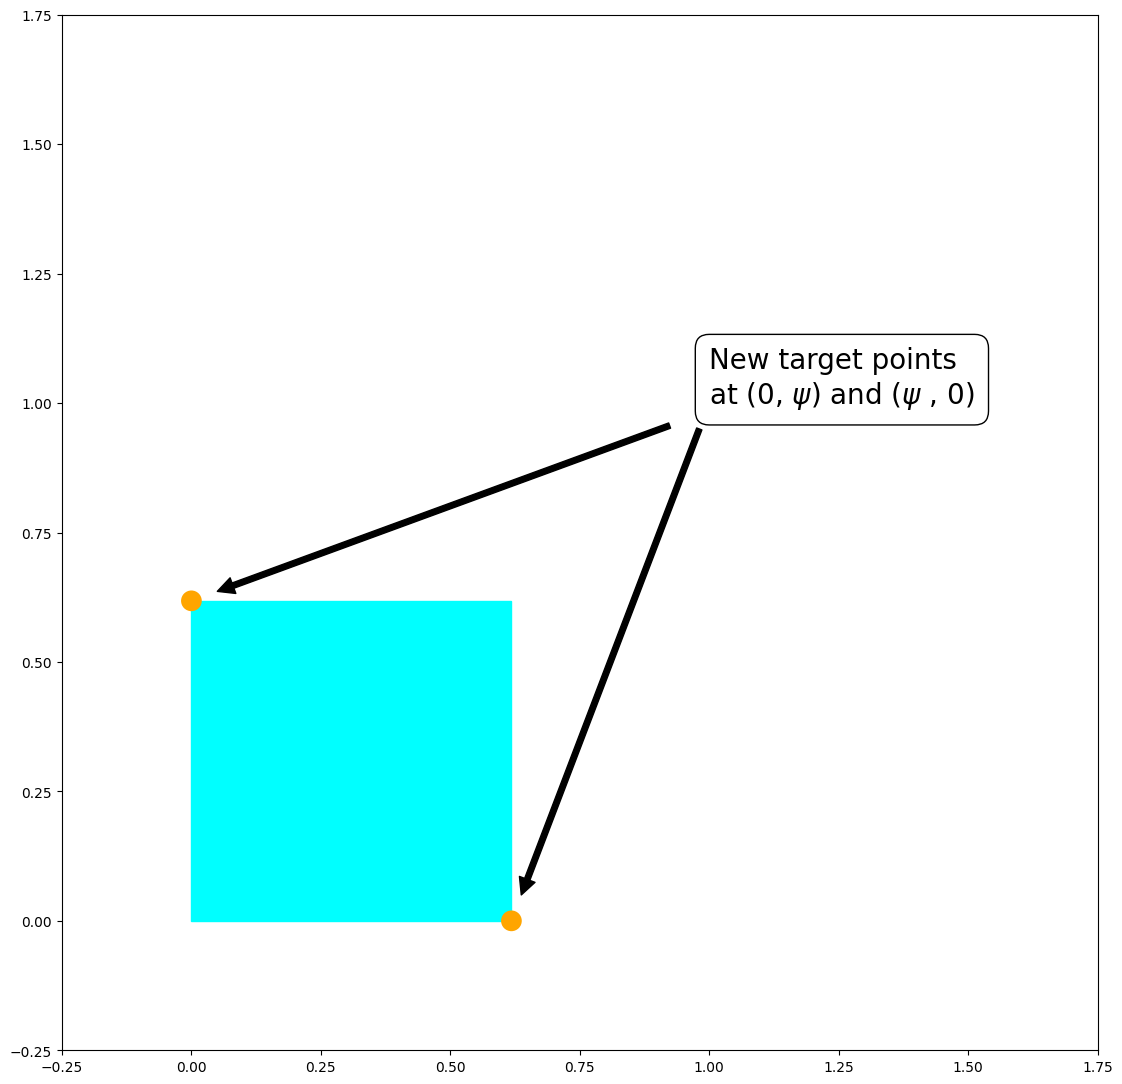

In [3]:
# start building the plot 
fig = plt.figure()

# Some manual axis manipulation to force the image to take a similar scale to the others.
ax = plt.axes([0,0,phi, phi * 640./480.]) 

depth = 1 # only one iteration for this figure                

CreatePlot(fig, ax, colors, colors2, depth, False)

phi = (5**.5 + 1)/2 # Golden ratio
psi = 1/phi
ax.add_patch(mpatches.Circle((0, psi), 0.02, facecolor='orange', linewidth=3))
ax.add_patch(mpatches.Circle((psi, 0), 0.02, facecolor='orange', linewidth=3))
ax.annotate('New target points\n' + r'at (0, $\psi$) and ($\psi$ , 0)', xy=(0, 0.618), xytext=(1, 1), fontsize=20,
           bbox={'boxstyle': 'Round', 'facecolor': 'white', 'alpha': 1, 'pad': .5, 'ec':'black'},
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.618, 0), xytext=(1, 1), fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

ticks = np.linspace(-.25, 1.75, 9) # More manual axis manipulation for correct scaling.
plt.xticks(ticks); plt.yticks(ticks)
plt.show()

The first iteration simply places one $\psi \times \psi$ square at the lower left corner of the figure, i.e. at the point $(0,0)$. (Again, throughout this document, to say that a square is placed at a point means that the square is placed so that the lower left corner of the square is at the stated point). The presence of the blue square creates two new lower left points, so to speak, at $(0, \psi)$ and $(\psi, 0)$. The second iteration places squares at these two target points. See:

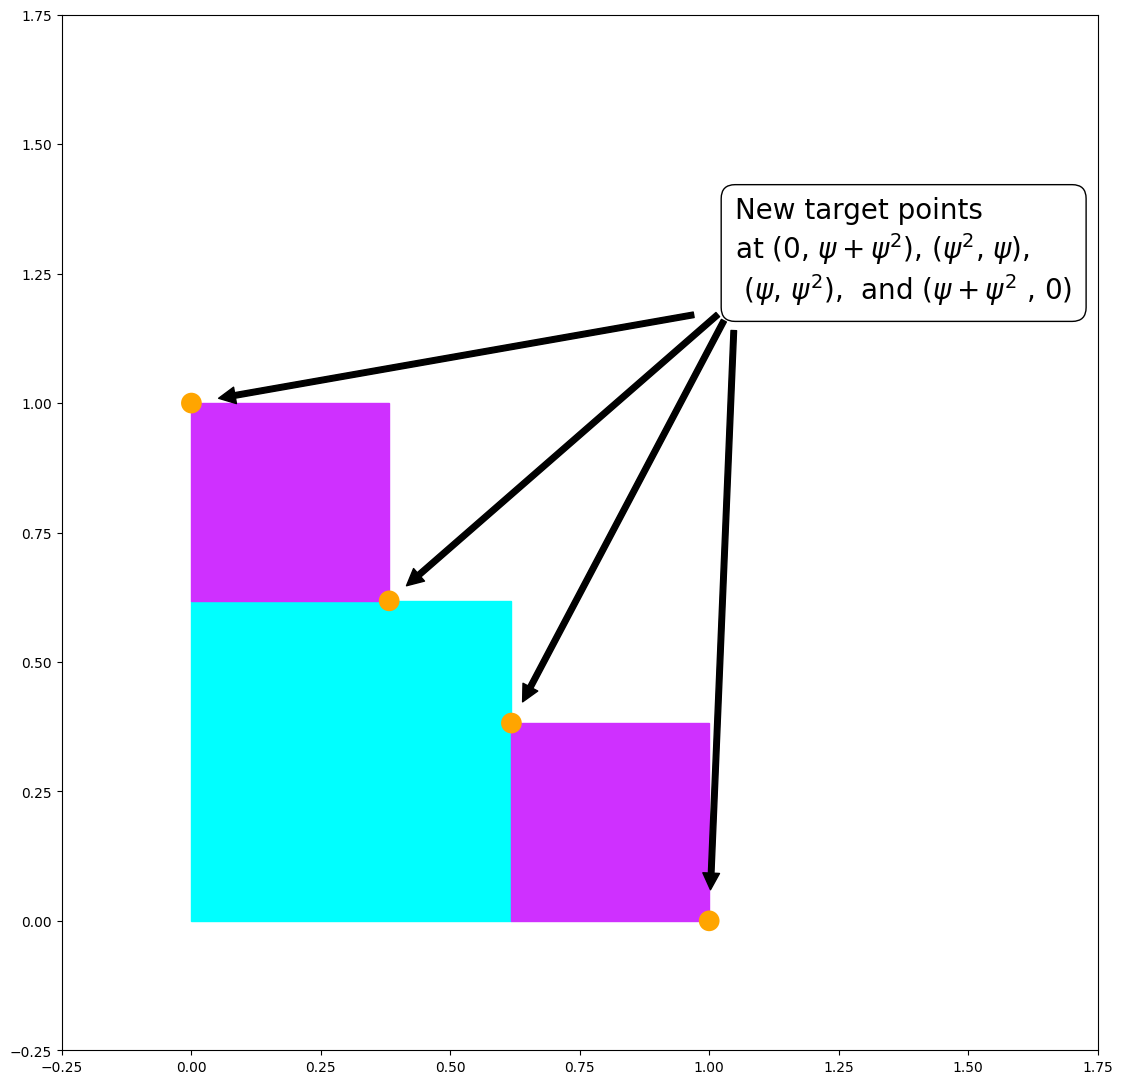

In [4]:
phi = (5**.5 + 1)/2 # Golden ratio
psi = 1/phi

# start building the plot 
fig = plt.figure()

# Some manual axis manipulation to force the image to take a similar scale to the others.
ax = plt.axes([0,0,phi, phi * 640./480.]) 

depth = 2 # two iterations for this figure                

CreatePlot(fig, ax, colors, colors2, depth, False)

ax.add_patch(mpatches.Circle((0, 1), 0.02, facecolor='orange', linewidth=3))
ax.add_patch(mpatches.Circle((psi ** 2, psi), 0.02, facecolor='orange', linewidth=3))
ax.add_patch(mpatches.Circle((psi, psi ** 2), 0.02, facecolor='orange', linewidth=3))
ax.add_patch(mpatches.Circle((1, 0), 0.02, facecolor='orange', linewidth=3))



ax.annotate('New target points\n' + r'at (0, $\psi + \psi^2$), ($\psi^2$, $\psi$),' + '\n' +
            r' ($\psi$, $\psi^2$),  and ($\psi+\psi^2$ , 0)', xy=(0, 1), xytext=(1.05, 1.2), fontsize=20,
           bbox={'boxstyle': 'Round', 'facecolor': 'white', 'alpha': 1, 'pad': .5, 'ec':'black'},
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(psi ** 2, psi), xytext=(1.05, 1.2), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(psi, psi ** 2), xytext=(1.05, 1.2), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(1, 0), xytext=(1.05, 1.2), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))


ticks = np.linspace(-.25, 1.75, 9) # More manual axis manipulation for correct scaling.
plt.xticks(ticks); plt.yticks(ticks)
plt.show()

The placement of two new squares created the four new target points indicated in the figure: at $(0, \psi + \psi^2), (\psi^2, \psi), (\psi, \psi^2),$ and $(\psi + \psi^2, 0)$. This is our first opportunity to apply $\psi$'s recursion equation {eq}`psi_recursion_eqn`. Setting $n=0$ in {eq}`psi_recursion_eqn` yields $\psi^2 + \psi^1 = \psi^0 = 1$. The left-most and right-most target points can be written $(0,1)$ and $(1,0)$. The recursion equation {eq}`psi_recursion_eqn` will play a more important role starting in the next iteration.

Until this point, the number of squares in used for each iteration has followed a simple pattern. The first iteration used one square, the second used two squares, and we see that the third iteration will use four. It appears that the number of squares doubles with each iteration. But this pattern is about to break.

Next iteration:

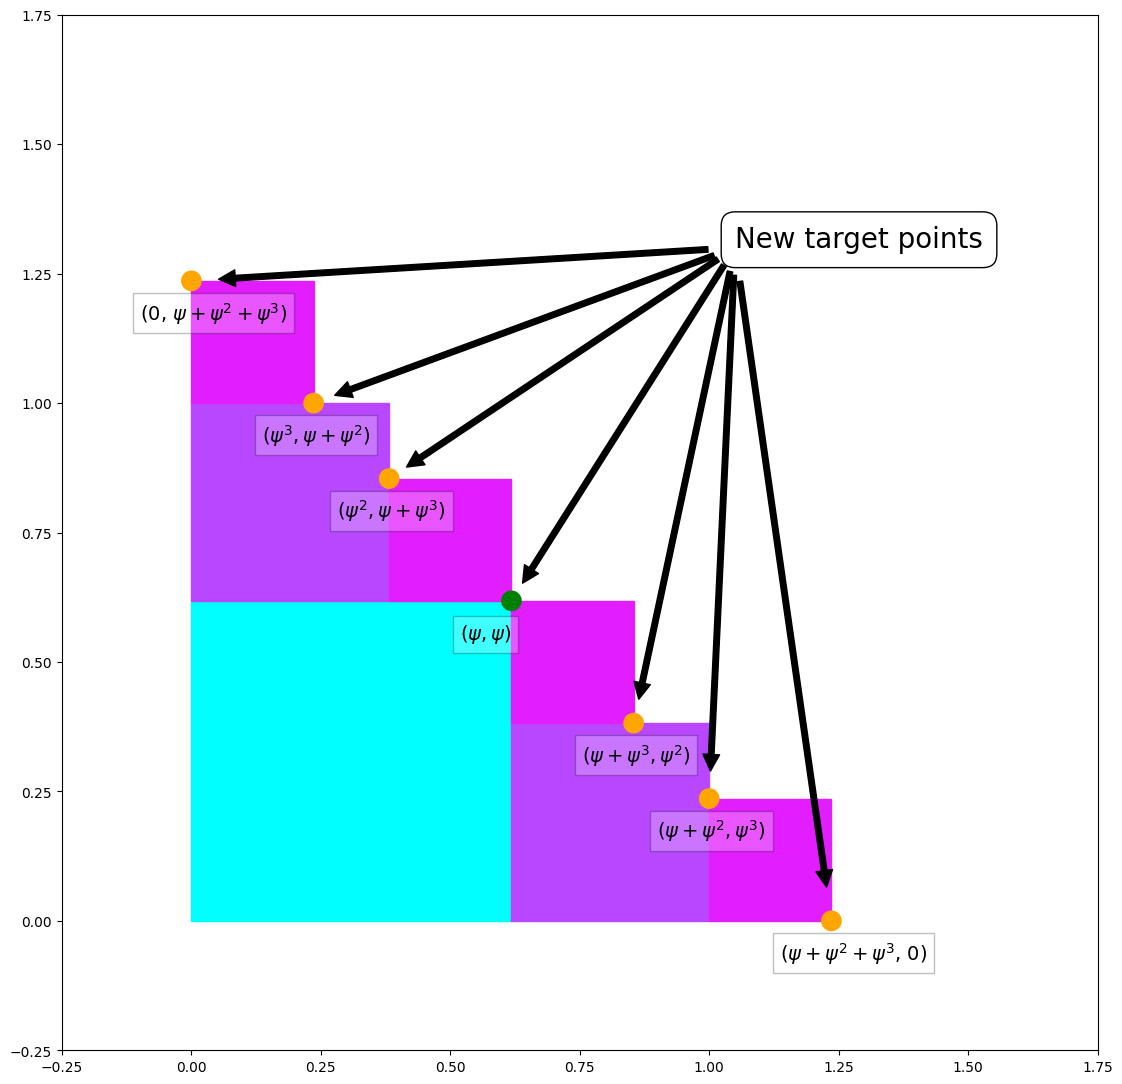

In [5]:
phi = (5**.5 + 1)/2 # Golden ratio
psi = 1/phi

# start building the plot 
fig = plt.figure()

# Some manual axis manipulation to force the image to take a similar scale to the others.
ax = plt.axes([0,0,phi, phi * 640./480.]) 

depth = 3 # three iterations                

CreatePlot(fig, ax, colors, colors2, depth, False)

singleTargets = [(0, 1+psi**3), (psi**3,1), (psi**2,psi+psi**3),
                 (psi+psi**3,psi**2), (1,psi**3), (1+psi**3, 0)] # Unrepeated target coordinates
singleTargetsText = [r'(0, $\psi+\psi^2+\psi^3$)', r'($\psi^3, \psi+\psi^2$)', r'($\psi^2, \psi+\psi^3$)',
                    r'($\psi+\psi^3, \psi^2$)', r'($\psi+\psi^2, \psi^3$)', r'($\psi+\psi^2+\psi^3$, 0)']

tloc = (1.05, 1.3) # Annotation text location and arrow origin location
ax.annotate('New target points', xy=tloc, xytext=tloc, fontsize=20,
           bbox={'boxstyle': 'Round', 'facecolor': 'white', 'alpha': 1, 'pad': .5, 'ec':'black'})
for loc, txt in zip(singleTargets, singleTargetsText):
    ax.add_patch(mpatches.Circle(loc, 0.02, facecolor='orange', linewidth=3)) # Put an orange dot
    ax.annotate(txt, xy=loc, xytext=tuple(map(lambda i, j: i-j, loc, (0.1, .075))), fontsize=14, # Annotate dot
               bbox={'facecolor': 'white', 'alpha': 0.25, 'pad': 5})
    ax.annotate('', xy=loc, xytext=tloc, fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05)) # Draw an arrow

# Special point gets a different color dot
specialTarget = (psi, psi)
ax.add_patch(mpatches.Circle((psi, psi), 0.02, facecolor='green', linewidth=3)) # Dot
ax.annotate('($\psi, \psi$)', xy=specialTarget, xytext=tuple(map(lambda i, j: i-j, 
            specialTarget, (0.1, .075))), fontsize=14, # Annotate dot
            bbox={'facecolor': 'white', 'alpha': 0.25, 'pad': 5})
ax.annotate('', xy=specialTarget, xytext=tloc, fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05)) # Draw an arrow

ticks = np.linspace(-.25, 1.75, 9) # More manual axis manipulation for correct scaling.
plt.xticks(ticks); plt.yticks(ticks)
plt.show()

This iteration only generated seven new target points instead of eight. The target point marked green in the figure is special. Notice that two magenta colored squares touch corners there. The green point is both $(\psi, \psi^2+\psi^3)$ and $(\psi^2+\psi^3, \psi)$. Recalling {eq}`psi_recursion_eqn` again, set $n=1$ and then $\psi^3+\psi^2=\psi$. So $(\psi, \psi^2+\psi^3)$ and $(\psi^2+\psi^3, \psi)$ are the same point and can both be written $(\psi, \psi)$. Since this one point took the place of two points, the total number of points was reduced by one from eight to seven.

The code which generates the fractal calculates every possible target point and then attempts to eliminate redundancy by placing all the points in a set. Sets are not allowed to contain the same element more than once. It's likely that this approach does not eliminate all redundancy due to rounding errors. It would be nice to handle the redundancies more elegantly. Will that perhaps be the next update?

The next iteration, the fourth one, which I won't illustrate, generates seven squares measuring $\psi^4 \times \psi^4$ and 12 new target points. The fifth iteration produces 12 $\psi^5 \times \psi^5$ squares and 20 new target points. In general, the number of squares produced in the $n^{th}$ iteration is $F_{n+2} - 1$ i.e. one less than the $n+2^{th}$ Fibonacci number. You could also say that the number of squares produced in the $n^{th}$ iteration equals the sum of the first $n$ Fibonacci numbers due to a well-known identity:  

$$
\sum_{i=1}^n F_n = F_{n+2}-1
$$

So now you have an idea how the lower left half of the fractal is produced. The code is set to run for 14 iterations because the image stops changing after 14. The upper right half is produced by reflecting the lower left half. I won't get into the gritty details of the arithmetic involved in reflection or the coloring scheme. This concludes the explanation. Hopefully somone will read this tutorial and enjoy it!